<a href="https://colab.research.google.com/github/RenatevanKempen/hello-world/blob/master/E9_CIFAR_10_Classification_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT  

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html



# STEP #1: IMPORT LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 93kB/s 
     |████████████████████████████████| 3.0MB 25.6MB/s 
     |████████████████████████████████| 419kB 42.6MB/s 


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

In [5]:
tf.__version__

'2.0.0-alpha0'

# STEP #2: LOAD DATASET

In [6]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_test.shape

(10000, 1)

# STEP #3: DATA VISUALIZATION

array([8], dtype=uint8)

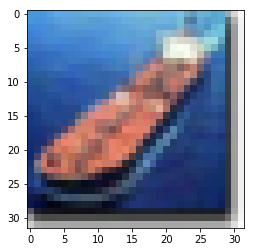

In [18]:
i = 3333
plt.imshow(X_train[i])
y_train[i]

array([5])

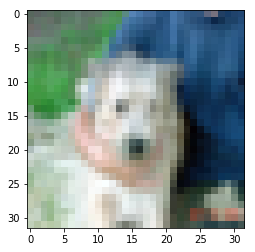

In [19]:
i = 444
plt.imshow(X_test[i])
y_test[i]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


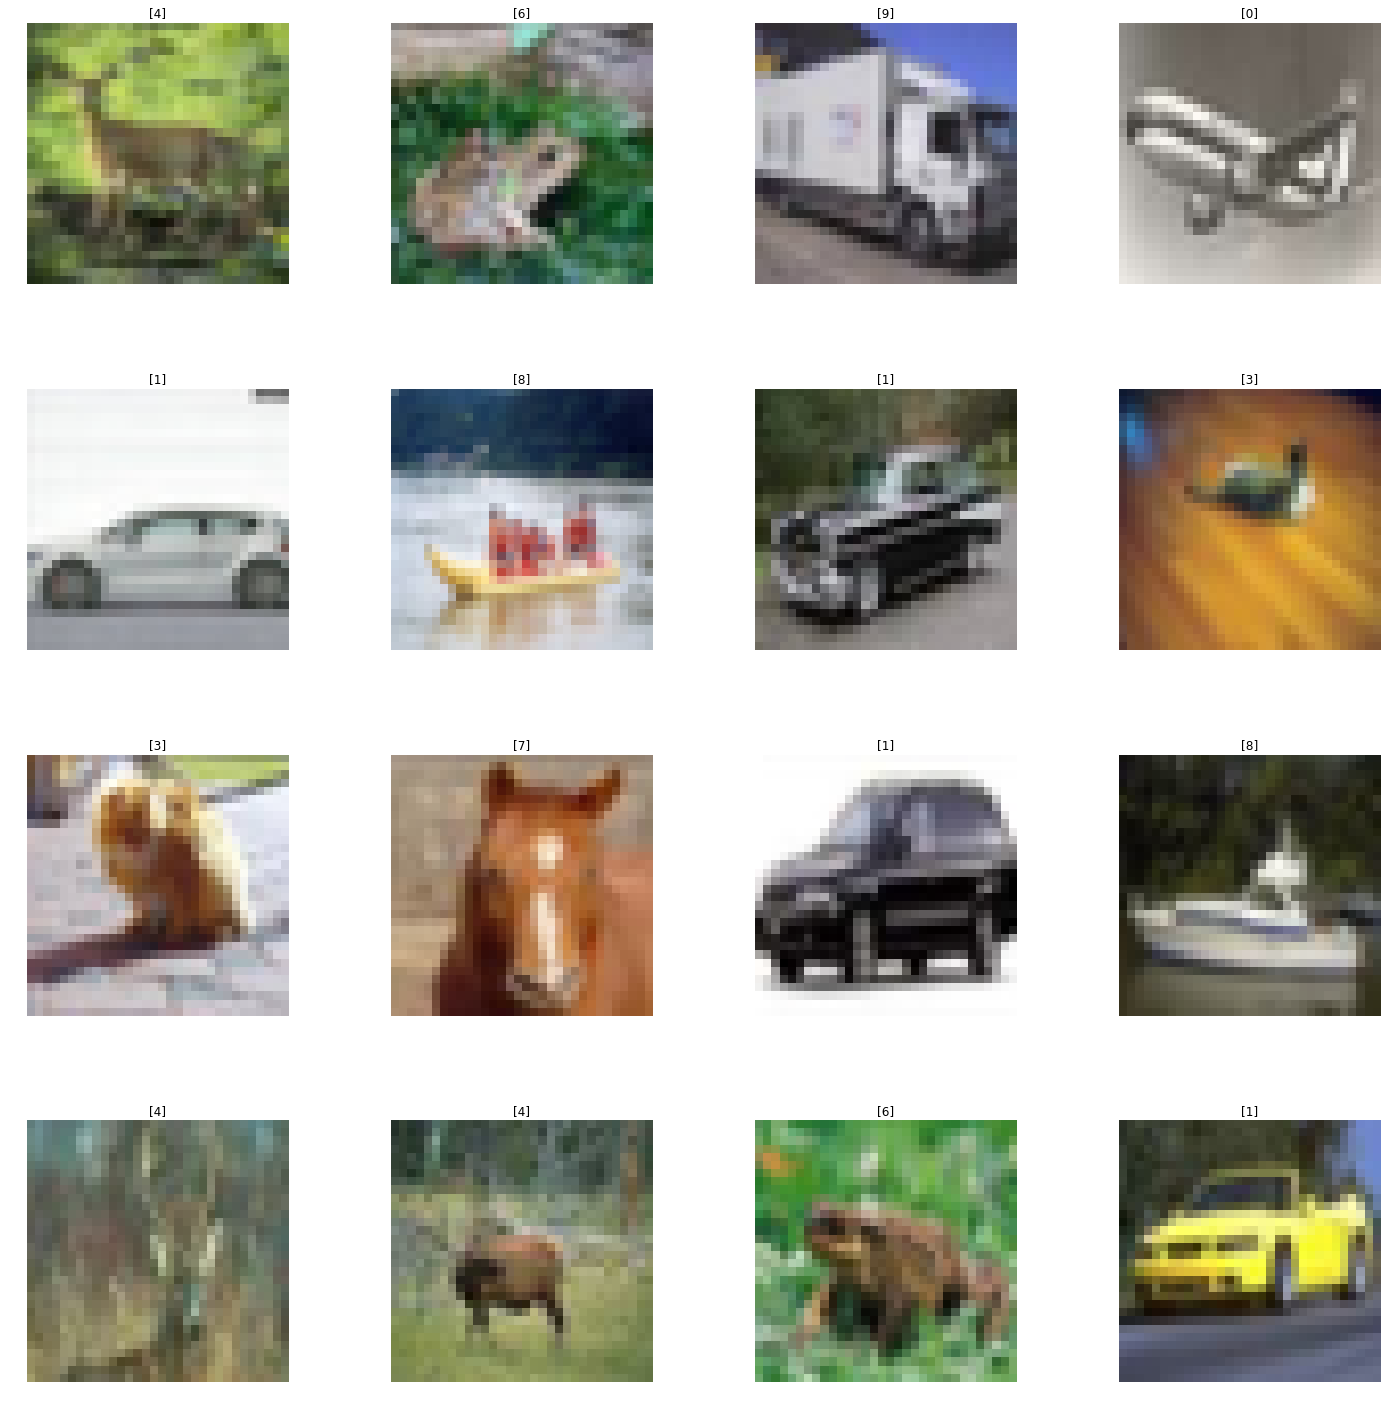

In [32]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 4
L_grid = 4

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 12)
    #to avoid having any x and y axes, you better turn this off
    axes[i].axis('off')
    #axes[i].axis('on')
plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => Airplanes
# 1 => Cars
# 2 => Birds
# 3 => Cats
# 4 => Deer
# 5 => Dogs
# 6 => Frogs
# 7 => Horses
# 8 => Ships
# 9 => Trucks

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


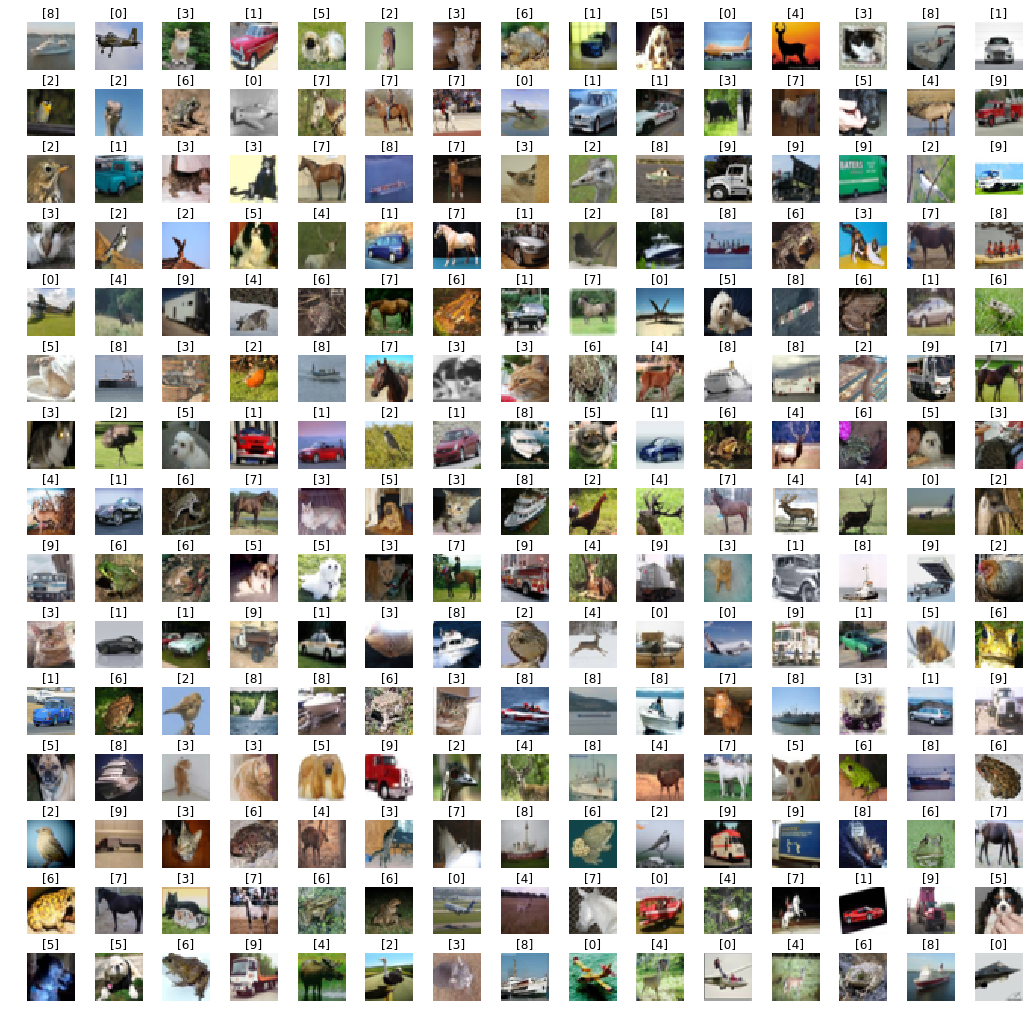

In [34]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (18,18))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 12)
    #to avoid having any x and y axes, you better turn this off
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => Airplanes
# 1 => Cars
# 2 => Birds
# 3 => Cats
# 4 => Deer
# 5 => Dogs
# 6 => Frogs
# 7 => Horses
# 8 => Ships
# 9 => Trucks

# STEP#4: DATA PREPARATION

In [35]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [0]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
#Normalize the data
X_train_gray_norm = (X_train - 128)/128
X_test_gray_norm = (X_test - 128)/128

In [51]:
X_train_gray_norm.shape

(50000, 32, 32, 3)

In [76]:
y_train

array([[9],
       [2],
       [0],
       ...,
       [4],
       [7],
       [0]], dtype=uint8)

In [54]:
X_test_gray_norm

array([[[[0.234375 , 1.875    , 1.3828125],
         [0.2421875, 1.8671875, 1.3671875],
         [0.2890625, 1.90625  , 1.3984375],
         ...,
         [0.0703125, 1.7421875, 1.28125  ],
         [1.984375 , 1.7109375, 1.28125  ],
         [1.90625  , 1.6640625, 1.2578125]],

        [[0.1875   , 1.875    , 1.3984375],
         [0.1796875, 1.859375 , 1.3125   ],
         [0.2421875, 1.890625 , 1.3515625],
         ...,
         [0.0625   , 1.7421875, 1.2421875],
         [1.9765625, 1.7109375, 1.25     ],
         [1.9296875, 1.6875   , 1.265625 ]],

        [[0.1796875, 1.859375 , 1.3671875],
         [0.1796875, 1.8515625, 1.2578125],
         [0.234375 , 1.8671875, 1.28125  ],
         ...,
         [0.0859375, 1.765625 , 1.265625 ],
         [0.015625 , 1.7421875, 1.265625 ],
         [1.9375   , 1.6953125, 1.2578125]],

        ...,

        [[1.53125  , 1.96875  , 0.3828125],
         [1.328125 , 1.78125  , 0.15625  ],
         [1.2421875, 1.6875   , 0.0703125],
         ...,


# STEP #5: TRAIN THE MODEL

In [92]:
from tensorflow.keras import datasets, layers, models

CiFar = models.Sequential()
CiFar.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
CiFar.add(layers.Conv2D(32, (3,3), activation = 'relu'))
CiFar.add(layers.MaxPooling2D())
CiFar.add(layers.Dropout(0.2))
CiFar.add(layers.Conv2D(64, (3,3), activation = 'relu'))
CiFar.add(layers.Conv2D(64, (3,3), activation = 'relu'))
CiFar.add(layers.MaxPooling2D())
CiFar.add(layers.Dropout(0.3))
CiFar.add(layers.Flatten())
CiFar.add(layers.Dense(1024, activation = 'relu'))
CiFar.add(layers.Dropout(0.3))
CiFar.add(layers.Dense(1024, activation = 'relu'))
CiFar.add(layers.Dense(10, activation = 'softmax'))
CiFar.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)         

In [0]:
CiFar.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [94]:
history = CiFar.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 nb_epoch = 100,
                 verbose = 1)

Epoch 1/100
50000/50000 [==============================] - 7s 134us/sample - loss: 1.9565 - accuracy: 0.2704
Epoch 2/100
50000/50000 [==============================] - 6s 128us/sample - loss: 1.5903 - accuracy: 0.4211
Epoch 3/100
50000/50000 [==============================] - 6s 130us/sample - loss: 1.4154 - accuracy: 0.4918
Epoch 4/100
50000/50000 [==============================] - 6s 127us/sample - loss: 1.3067 - accuracy: 0.5321
Epoch 5/100
50000/50000 [==============================] - 6s 128us/sample - loss: 1.2164 - accuracy: 0.5649
Epoch 6/100
50000/50000 [==============================] - 6s 129us/sample - loss: 1.1281 - accuracy: 0.5956
Epoch 7/100
50000/50000 [==============================] - 6s 128us/sample - loss: 1.0599 - accuracy: 0.6222
Epoch 8/100
50000/50000 [==============================] - 6s 128us/sample - loss: 0.9971 - accuracy: 0.6448
Epoch 9/100
50000/50000 [==============================] - 6s 130us/sample - loss: 0.9500 - accuracy: 0.6623
Epoch 10/100
50000/

# STEP #6: EVALUATE THE MODEL

In [95]:
score = CiFar.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

10000/10000 [==============================] - 2s 167us/sample - loss: 1.3496 - accuracy: 0.6763
Test Accuracy: 0.6762999892234802


In [96]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [0]:
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

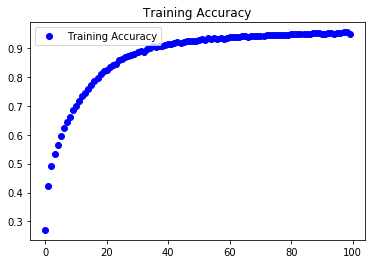

In [98]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy')
plt.legend()

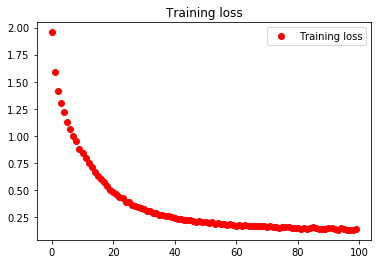

In [99]:
plt.plot(epochs, loss, 'ro', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()

In [0]:
predicted_classes = CiFar.predict_classes(X_test_gray_norm)
y_true = y_test

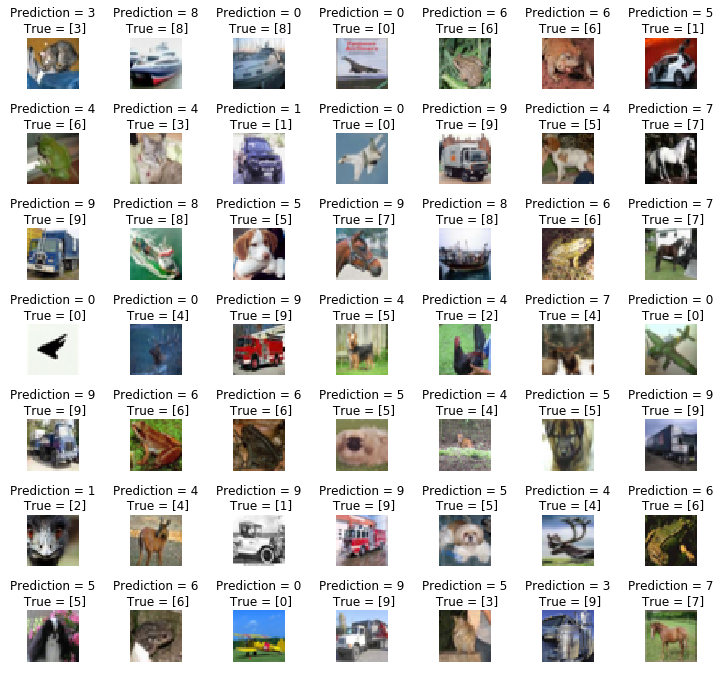

In [101]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  

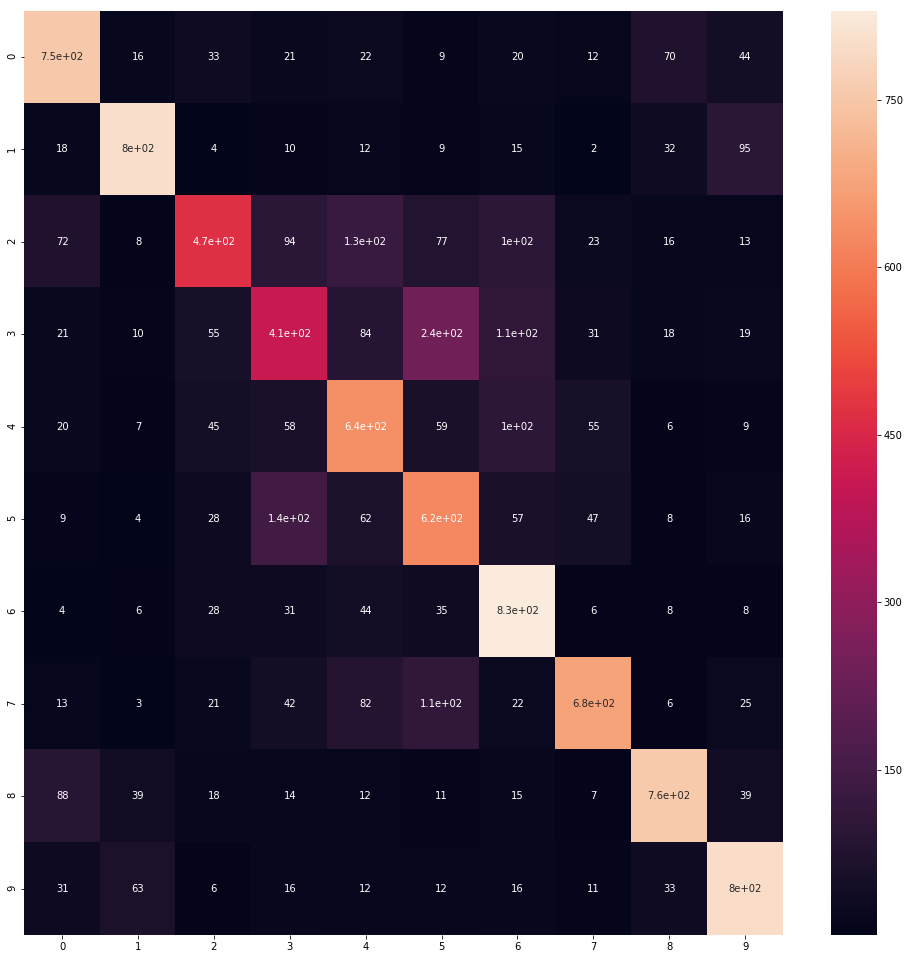

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (17, 17))
sns.heatmap(cm, annot = True)